In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import plotly.express as px

import sklearn.datasets
from sklearn.model_selection import train_test_split

In [11]:
# Input data files consisting of the images
data = sklearn.datasets.fetch_olivetti_faces()

In [12]:
images = data["data"]
labels = data['target']

print("There are {} images".format(len(images)))
print("Image Dimensionality: {}".format(images.shape[1]))
print("There are {} unique people".format(len(np.unique(labels))))


There are 400 images
Image Dimensionality: 4096
There are 40 unique people


In [13]:
training, X_test, y_train, y_test=train_test_split(images, labels, test_size=0.3, stratify=labels, random_state=0)


In [14]:
get_wd = "C:/Users/Dell/Desktop/Ashoka/SEMESTER5/Introduction to Machine Learning/Assignments/HW3_Eigenfaces/"
train_dir = "Dataset/train_set/"
test_dir = "Dataset/test_set/"
test = "Dataset/test/"
# height and width of the image
height = 64  
width = 64


In [15]:
def image_matrix(images):
	'''
	Input: Image Dataset (relative path )

	Function: for each image in the image dataset, creates a vector of the image and stores it in a matrix.
	Note: For training and testing the images must be in different directories

	Output: Subplots images( if the number of images are odd ignore the out of bounds exception)
	Returns: image matrix 
	'''
	#creating a training matrix all set to zero of size m*n by number of training images
	matrix = np.ndarray(shape=(height*width,len(images)), dtype = np.float32)
	figure, ax = plt.subplots(nrows=20,ncols=20, figsize = (5,3))
	
	for i, img in enumerate(images):
		#creating a column matrix of image and storing as a column entry in the training matrix
		matrix[:,i:] = img.reshape(-1,1)  
		ax.ravel()[i].imshow(img.reshape(height,width), cmap='gray')
		ax.ravel()[i].set_axis_off()
		plt.tight_layout()
	plt.show()

	return matrix

KeyboardInterrupt: 

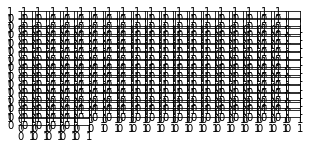

In [16]:
training_matrix = image_matrix(images)

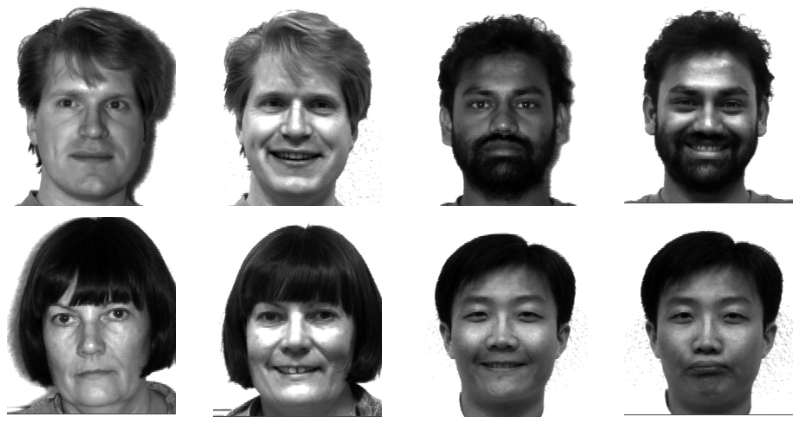

In [5]:
testing_matrix = image_matrix(test_dir)

## Mean face
For every image, we create a column vector  $I_i$ where $1\leq i \leq m$ such that,
$I_i = \begin{aligned}\begin{bmatrix}
           i_{1} \\
           i_{2} \\
           \vdots \\
           i_{n \times n}
         \end{bmatrix}
         \end{aligned}$
For each image vector we create a matrix of images $A$ where, 
$$A = [I_1, I_2,..., I_m]$$

Computing the mean vector for each $I_i$ in A
$$\mu = \frac{1}{m} \sum_{i - 1}^{m}A_i$$
$$mean\_matrix / normalized\_faces = A_i - \mu$$

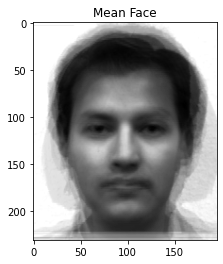

In [6]:
mean = np.zeros((1,height*width))
n = np.shape(training_matrix)[1]
for i in range(n):
	mean = np.add(mean, training_matrix[:,i])

#dividing by n
for i,data in enumerate(mean[0]):
	mean[0][i]= float(data/n)

plt.imshow(mean[0].reshape(width, height), cmap='gray')
plt.title("Mean Face")
plt.show()

In [7]:
## A - mu
def normalization(matrix):
	'''
	Input: training or testing matrix

	Function: subtracts the mean form the input matrix

	Output: Subplots normalized faces( if the number of images are odd ignore the out of bounds exception)
	Returns: normalization_matrix 
	'''
	figure, ax = plt.subplots(nrows=2,ncols=int(np.shape(matrix)[1]/2), figsize = (12,6))
	normalization_matrix = np.ndarray(shape=(height*width, np.shape(matrix)[1]))
	for i in range(np.shape(matrix)[1]):
		normalization_matrix[:,i] = np.subtract(matrix[:,i],mean)
		normal_img = normalization_matrix[:,i].reshape(width,height)
		ax.ravel()[i].imshow(normal_img, cmap='gray')
		ax.ravel()[i].set_axis_off()
		plt.tight_layout()
		plt.suptitle("Normalized Faces", size = 15)
	plt.show()
	return normalization_matrix

	

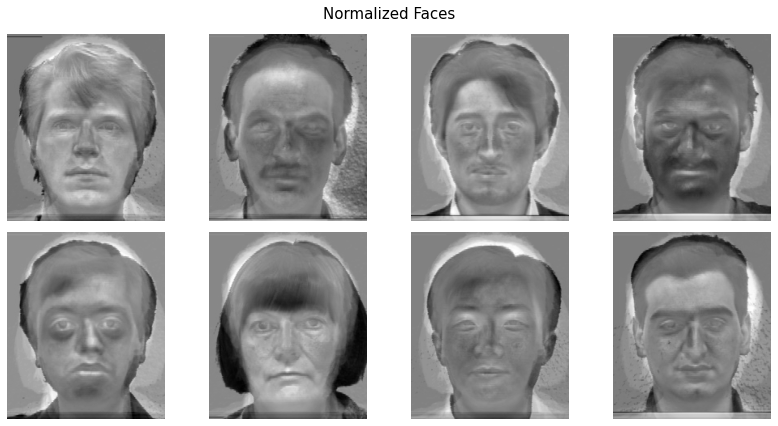

In [8]:
normalized_training_matrix = normalization(training_matrix)

## Computing covariance matrix $AA^T$
$A$ is $n^2 \times m$ matrix
$A^T$ is $m \times n^2$ matrix

$AA^T$ is a $n^2 \times n^2$ matrix so computing $AA^T$ is inefficient.  
Thus, we compute $A^TA$ matrix of size $m \times m$.

In [9]:
cov_matrix = np.cov(normalized_training_matrix.transpose())
cov_matrix = np.divide(cov_matrix,np.shape(normalized_training_matrix)[1])
print(cov_matrix.shape)

fig = px.imshow(cov_matrix,labels = dict(color = "Viridis"))
fig.show()


NameError: name 'normalized_training_matrix' is not defined

## Computing the eigenvectors and eigen values of the reduced covairance matrix and mappig them to $AA^T$
$A^TA v_i = c_i v_i$ where $c_i$ is the eigenvalue correspoinding to the eigenvector $v_i$.  
Note: $A^TA$ and $AA^T$ have the same eigen values while the eigen vectors are related by the equation $u_i = Av_i$ where, $u_i = N^2 \times 1$.  
Before mapping the eigen vectors to $AA^T$, we first do the PCA and choose the approproiate number of principle components(makes the whole process easier).

Note: In numpy eigenvectors are the column vectors 

In [57]:
eigen_val, eigen_vec = np.linalg.eig(cov_matrix)
## mapping eigenvec to eigneval 
eigen_pairs = []
for i, values in enumerate(eigen_val):
	buffer = []
	buffer = [values,eigen_vec[:,i]]
	
	eigen_pairs.append(buffer)

eigen_pairs.sort(key=lambda tup: tup[0], reverse=True)
print(eigen_pairs)


[[1115.5495084988243, array([ 0.24216786, -0.2320557 , -0.15104702, -0.41563654,  0.05114387,
        0.73015769,  0.14350419, -0.36823436])], [485.89262458034415, array([-0.23304127,  0.21004915, -0.0756895 ,  0.18098142, -0.48868195,
        0.53226997, -0.47101419,  0.34512637])], [295.2849294986144, array([ 0.34900164,  0.66156373, -0.49779746, -0.36828479,  0.0789403 ,
       -0.15710617, -0.14266291,  0.07634566])], [232.09771241447385, array([-0.46008264,  0.14797794, -0.57605919,  0.45683638,  0.28068609,
        0.14579398,  0.25325285, -0.2484054 ])], [228.05915282622155, array([-0.26652539, -0.26666354, -0.08822017, -0.28510056,  0.65529232,
        0.08274941, -0.31472933,  0.48319727])], [176.4271416272429, array([ 0.24263134, -0.40750816, -0.46987952,  0.0496277 , -0.29622126,
       -0.06932017,  0.41459652,  0.53607356])], [122.95513549958098, array([-0.54650028,  0.28336041,  0.19555006, -0.49133856, -0.17720876,
        0.03110374,  0.52641965,  0.17861375])], [1.0228

## PCA
Recall: the eigenvalues of the priciple components are the variances of the covairance matrix i.e the diagonal entries. 
As the eigevalues become smaller and samaller, the variation decreases hence, we can choose eignevectors with high eigenvalues to represent our data. But, what number of eigenvalue-vector pair($k$) contribute to the PC?  
We plot the cumulative sum of eigenvalues. Then, $k$ = The point at which the curve levels up.


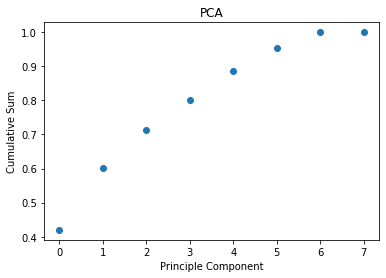

In [58]:
pca_confidence = 1  #change here to vary the confidence(int/float)
def pca(pca_confidence):
	'''
	args: 
	pca_confidence: default= 1. Number between 0-1. To choose the number of principle components from the cumulative variance. 0 is leeast and 1 is max.
	return: k 
	'''
	component_cumulative_sum = []
	cumulative_sum = 0
	for data in eigen_pairs:
		cumulative_sum += data[0]
		component_cumulative_sum.append(cumulative_sum)

	total = component_cumulative_sum[-1]

	plt.scatter(list(range(0,len(eigen_pairs))), component_cumulative_sum/total)
	plt.ylabel("Cumulative Sum")
	plt.xlabel("Principle Component")
	plt.title("PCA")
	plt.show()

	for i, component in enumerate(component_cumulative_sum):
		if component/total >= pca_confidence:
			return i+1


k = pca(pca_confidence)   #get the value of k

## Computing $u_i = A v_i$ and plotting eigen faces
Important: normalize $u_i:||u_i|| = 1$

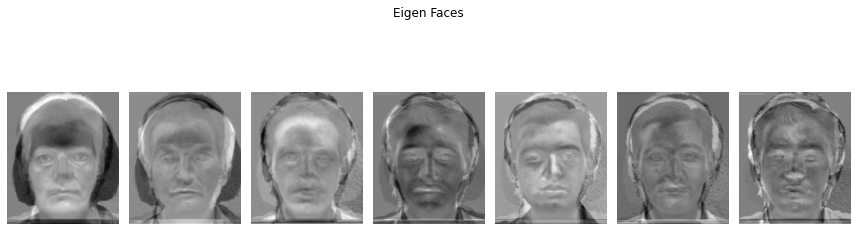

In [128]:
k_eigen_pair = eigen_pairs[:k]	  # choose k eigen pairs
u_i = []
fig = plt.figure(figsize=(12,9))
for vectors in k_eigen_pair:
	x = np.dot(training_matrix,vectors[1])
	x = np.divide(x,np.linalg.norm(x))
	u_i.append(x)

	## plotting the eigenfaces
	ax = fig.add_subplot(2,7,len(u_i))
	ax.set_axis_off()
	plt.tight_layout()
	
	ax.imshow(np.array(x).reshape(width,height), cmap='gray')
plt.suptitle("Eigen Faces")	
plt.show()

## Findind weights for each training image
$normalized\_faces = n^2 \times m$   
$u\_i = k \times n^2$   

In [129]:

for i in normalized_training_matrix.transpose():
	w = np.dot(np.array(u_i),i)
	print(w)

[ 4207.22010979 -4290.72008742  4168.03348422 -6861.17647909
 -3334.71653938  4119.51765808 -5104.05229117]
[-4416.84516614  3145.26984994  6592.34322387  2262.58954406
 -2064.57129552 -3771.25762697  2356.40864651]
[-3223.22836896 -1414.34673377 -4909.56075902 -5436.80418282
 -1113.29258648 -2634.95497034   704.95257693]
[-8122.57727437  2675.78230628 -3934.90122634  4290.39779096
 -2299.31800041  -257.22485333 -2722.01848141]
[ 1243.99774943 -5847.8084499    598.57932356  3324.46389653
  6205.55765022 -3012.8455802   -555.01191812]
[15052.94554371  7896.00738039 -2080.06739482  3839.6220761
  1498.66072178 -2378.6769804   1479.67807394]
[ 2843.87756378 -6118.04824375 -1448.03390957  1775.23859297
 -2841.91665398  3095.80072972  3326.27601205]
[-7585.39015724  3953.86397823  1013.60725809 -3194.33123871
  3949.59670379  4839.64162345   513.76738127]
